<a href="https://colab.research.google.com/github/GonzaOrtiz020/Big-Data/blob/main/Proyecto_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Subida y limpieza del csv

In [49]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from matplotlib import style
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
!pip install langdetect
from langdetect import detect
import string

In [50]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
import pandas as pd
from google.colab import files

# Función para cargar y limpiar el CSV
def df_csv(file_path):
    # Leer el archivo CSV
    data = pd.read_csv(file_path, delimiter=',', encoding='utf-8')

    # Verificar si hay una columna no deseada (por ejemplo, un índice)
    if 'Unnamed: 0' in data.columns:
        data = data.drop(columns=['Unnamed: 0'])

    # Verificar que el número de columnas coincida con los nombres de las columnas esperados
    expected_columns = ['tweet_id', 'entity', 'sentiment', 'content']
    if len(data.columns) == len(expected_columns):
        data.columns = expected_columns
    else:
        raise ValueError(f"Number of columns in data ({len(data.columns)}) does not match expected number ({len(expected_columns)})")

    return data

# Cargar el archivo CSV desde la computadora
uploaded = files.upload()

# Obtener el nombre del archivo subido
file_path = next(iter(uploaded))

# Limpiar el archivo CSV
df_nuevo = df_csv(file_path)

Saving twitter_training.csv to twitter_training.csv


In [52]:
# Mostrar los primeros registros del nuevo DataFrame
df_nuevo.head()

,tweet_id,entity,sentiment,content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


Valores duplicados y nulos

In [53]:
# Detectar valores duplicados en el CSV
print(f'Valores duplicados en el CSV: {df_nuevo.duplicated().sum()}')

# Encontrar valores nulos en el CSV
print(f'Valores nulos en el CSV:\n{df_nuevo.isnull().sum()}')

Valores duplicados en el CSV: 2700
Valores nulos en el CSV:
tweet_id       0
entity         0
sentiment      0
content      686
dtype: int64


In [54]:
# Eliminar filas con valores nulos en las columnas 'Tweet_id' y 'Content'
df_nuevo = df_nuevo.dropna(subset=['tweet_id', 'content'])

# Eliminar filas con valores duplicados en la columna 'Tweet_id'
df_nuevo = df_nuevo.drop_duplicates(subset=['tweet_id'])

In [55]:
# Mostrar los primeros registros del DataFrame sin valores duplicados ni nulos
df_nuevo.head()

,tweet_id,entity,sentiment,content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
11,2403,Borderlands,Neutral,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM..."
17,2404,Borderlands,Positive,that was the first borderlands session in a lo...
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...


Normalización del texto

In [56]:
def texto_limpiar(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar URLs
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE)
    # Eliminar menciones de usuarios (@usuario)
    texto = re.sub(r'@\w+', '', texto)
    # Eliminar puntuación
    texto = re.sub(r'[^A-Za-z0-9\s]+', '', texto)
    return texto

# Aplicar la limpieza de texto a la 'Content'
df_nuevo['content'] = df_nuevo['content'].apply(texto_limpiar)

# Guardar el DataFrame limpio como un nuevo archivo CSV
df_nuevo.to_csv('twitter_training_limpio.csv', index=False, sep=';', encoding='utf-8-sig')

# Mostrar algunos registros para verificar
print(df_nuevo.head())

    tweet_id       entity sentiment  \
0       2401  Borderlands  Positive   
5       2402  Borderlands  Positive   
11      2403  Borderlands   Neutral   
17      2404  Borderlands  Positive   
23      2405  Borderlands  Negative   

                                              content  
0   i am coming to the borders and i will kill you...  
5   so i spent a few hours making something for fu...  
11  rockhard la varlope rare  powerful handsome ja...  
17  that was the first borderlands session in a lo...  
23  the biggest dissappoinment in my life came out...  


# Análisis descriptivo

Descripción de los datos

In [57]:
# Información básica sobre los datos
print(df_nuevo.info())

# Resumen estadístico de los datos
display(df_nuevo.describe())

# Verificar los tipos de datos
print(f'Tipos de datos:\n{df_nuevo.dtypes}')

<class 'pandas.core.frame.DataFrame'>
Index: 12447 entries, 0 to 74675
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   12447 non-null  int64 
 1   entity     12447 non-null  object
 2   sentiment  12447 non-null  object
 3   content    12447 non-null  object
dtypes: int64(1), object(3)
memory usage: 486.2+ KB
None


,tweet_id
count,12447.000000
mean,6432.586165
std,3740.553090
min,1.000000
25%,3195.500000
50%,6422.000000
75%,9600.500000
max,13200.000000


Tipos de datos:
tweet_id      int64
entity       object
sentiment    object
content      object
dtype: object


Análisis de sentimiento

In [58]:
# Función para calcular porcentaje
def percentage(part, whole):
    return 100 * float(part) / float(whole)

# Asegurar de que todos los valores en 'content' sean cadenas de texto
df_nuevo['content'] = df_nuevo['content'].astype(str)

# Inicialización de contadores y listas
positivo = 0
negativo = 0
neutral = 0
polaridad = 0
tweet_list = []
sentiment_list = [] # Basado en VADER

# Análisis de cada tweet en df_nuevo
for tweet in df_nuevo['content']:
    tweet_list.append(tweet)
    analisis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polaridad += analisis.sentiment.polarity

    if neg > pos:
        sentiment_list.append("negative")
        negativo += 1
    elif pos > neg:
        sentiment_list.append("positive")
        positivo += 1
    else:
        sentiment_list.append("neutral")
        neutral += 1

# Cálculo de porcentajes
total_tweets = len(df_nuevo)
positivo = format(percentage(positivo, total_tweets), '.1f')
negativo = format(percentage(negativo, total_tweets), '.1f')
neutral = format(percentage(neutral, total_tweets), '.1f')
polaridad = format(percentage(polaridad, total_tweets), '.1f')

# Impresión de resultados
print(f'Positivo: {positivo}%')
print(f'Negativo: {negativo}%')
print(f'Neutral: {neutral}%')
print(f'Polaridad: {polaridad}%')

Positivo: 46.4%
Negativo: 39.5%
Neutral: 14.2%
Polaridad: 7.4%


In [59]:
# Crear nuevo df y más features
tw_list = pd.DataFrame(tweet_list, columns=['content'])
tw_list['sentiment'] = sentiment_list

In [60]:
# Calculando valores de negatividad, positividad, neutralidad y compuesto
tw_list[['polarity', 'subjectivity']] = tw_list['content'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['content'].items():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    tw_list.loc[index, 'neg'] = score['neg']
    tw_list.loc[index, 'neu'] = score['neu']
    tw_list.loc[index, 'pos'] = score['pos']
    tw_list.loc[index, 'compound'] = score['compound']

tw_list.head(10)

,content,sentiment,polarity,subjectivity,neg,neu,pos,compound
0,i am coming to the borders and i will kill you...,negative,0.000000,0.000000,0.343,0.657,0.000,-0.6908
1,so i spent a few hours making something for fu...,positive,0.239286,0.507143,0.036,0.665,0.299,0.9222
2,rockhard la varlope rare powerful handsome ja...,positive,0.366667,0.966667,0.000,0.571,0.429,0.7184
3,that was the first borderlands session in a lo...,positive,0.280000,0.486667,0.216,0.568,0.217,0.0076
4,the biggest dissappoinment in my life came out...,negative,-0.400000,0.600000,0.241,0.759,0.000,-0.5423
5,we finished borderlands 3 finally yas thank yo...,positive,0.166667,0.466667,0.000,0.838,0.162,0.7311
6,man gearbox really needs to fix this dissapoin...,negative,0.290606,0.490909,0.164,0.836,0.000,-0.6689
7,check out this epic streamer,neutral,0.100000,0.400000,0.000,1.000,0.000,0.0000
8,blaming sight for tardiness a little bit of bo...,negative,-0.195833,0.600000,0.154,0.719,0.127,0.0516
9,why does like every man in borderlands have sl...,negative,-0.400000,0.500000,0.280,0.623,0.097,-0.6908


Word Cloud Saved Successfully


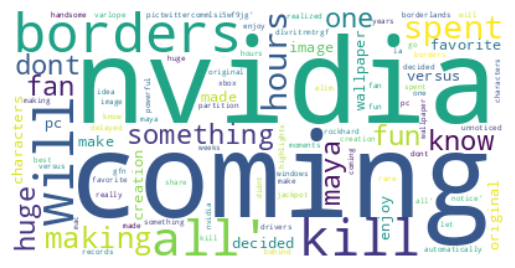

In [61]:
# Crear nube de palabras para visualizar palabras clave
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", max_words=3000, stopwords=stopwords, repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path = "wc.png"
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

create_wordcloud(tw_list["content"].values)

# Entrenamiento del modelo

In [62]:
# Base de entrenamiento y pruebas
X = df_nuevo['content']
y = df_nuevo['sentiment']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Mostrar los primeros registros de los conjuntos de entrenamiento y prueba
print("Ejemplos de datos de entrenamiento:")
print(x_train.head(2))
print("Ejemplos de datos de prueba:")
print(x_test.head(2))

Ejemplos de datos de entrenamiento:
10259                                              
43349    pubg painter unexplained bullshit guidance
Name: content, dtype: object
Ejemplos de datos de prueba:
2375    time to get used to black ops controls again c...
1481                      yooooo this could be so bad ass
Name: content, dtype: object


Entrenamiento mediante Pipeline

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Crear el pipeline con TfidfVectorizer y MultinomialNB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('nb', MultinomialNB())
])

# Entrenar el modelo con el conjunto de entrenamiento
pipeline.fit(x_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = pipeline.predict(x_test)

# Evaluar el modelo
print("Accuracy (Naive Bayes):", metrics.accuracy_score(y_test, y_pred))
print("Classification Report (Naive Bayes):\n", metrics.classification_report(y_test, y_pred))

Accuracy (Naive Bayes): 0.5349397590361445
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

  Irrelevant       0.58      0.11      0.18       421
    Negative       0.53      0.80      0.63       761
     Neutral       0.60      0.31      0.41       627
    Positive       0.52      0.71      0.60       681

    accuracy                           0.53      2490
   macro avg       0.56      0.48      0.46      2490
weighted avg       0.55      0.53      0.49      2490



Validación cruazada

Cross-validation scores: [0.5188755  0.48393574 0.4214544  0.41623142 0.52430695]
Mean cross-validation score: 0.47296080263198237


<ipython-input-65-0b36ba3aab2d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range(1, 6), y=scores, palette='viridis')


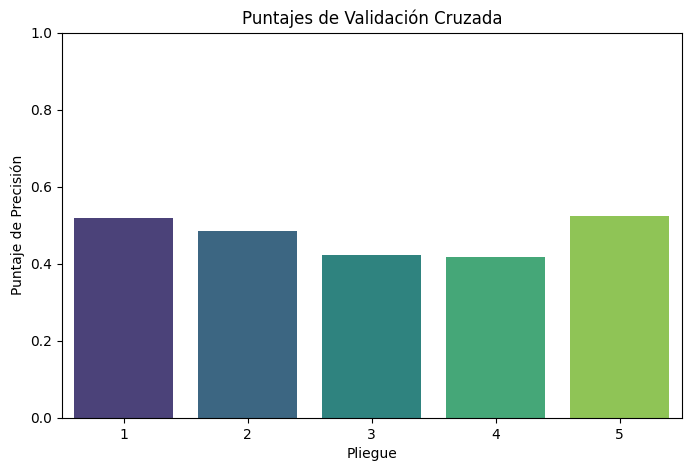

In [65]:
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Asegurarse de que 'sentiment' sea de tipo 'category' (Error cuando hay datos que no son de este tipo)
if not df_nuevo['sentiment'].dtype.name == 'category':
    df_nuevo['sentiment'] = df_nuevo['sentiment'].astype('category')

# Calcular los puntajes de la validación cruzada
scores = cross_val_score(pipeline, df_nuevo['content'], df_nuevo['sentiment'].cat.codes, cv=5, scoring='accuracy')

# Imprimir los puntajes de validación cruzada
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Graficar los resultados
plt.figure(figsize=(8, 5))
sns.barplot(x=range(1, 6), y=scores, palette='viridis')
plt.title('Puntajes de Validación Cruzada')
plt.xlabel('Pliegue')
plt.ylabel('Puntaje de Precisión')
plt.ylim(0, 1)  # Establecer el límite del eje y entre 0 y 1 para representar correctamente los puntajes
plt.show()

Métricas

In [66]:
from sklearn.metrics import  precision_score,f1_score,accuracy_score
# Calcular las métricas de evaluación
precision = precision_score(y_test, y_pred, average='weighted')
exactitud = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar las métricas
print(f'Precisión: {precision}')
print(f'Exactitud: {exactitud}')
print(f'F1-score: {f1}')

Precisión: 0.5519255212257521
Exactitud: 0.5349397590361445
F1-score: 0.4918311861890559


In [67]:
# Crear una lista de métricas y sus valores
metricas = ['Precisión', 'Exactitud', 'F1-score']
valores = [precision, exactitud, f1]

<ipython-input-68-402f4c3ff9f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metricas, y=valores, palette='viridis')


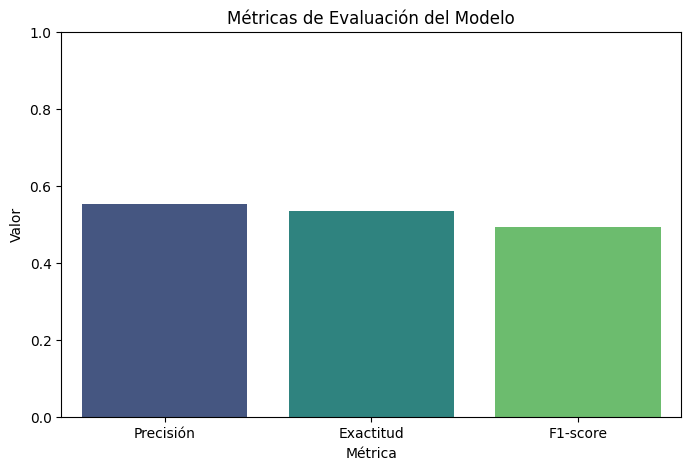

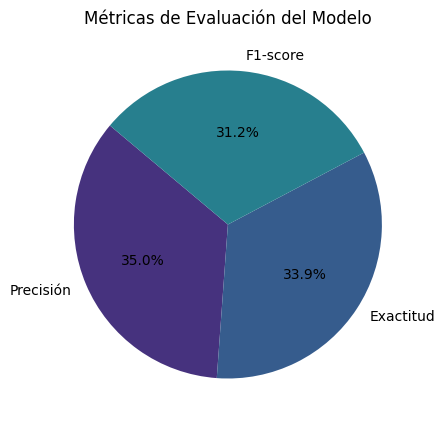

In [68]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=metricas, y=valores, palette='viridis')
plt.title('Métricas de Evaluación del Modelo')
plt.ylabel('Valor')
plt.ylim(0, 1)  # Establecer el límite del eje y entre 0 y 1 para representar correctamente las métricas
plt.xlabel('Métrica')
plt.show()

# Crear un gráfico circular (pie chart)
plt.figure(figsize=(8, 5))
plt.pie(valores, labels=metricas, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=140)
plt.title('Métricas de Evaluación del Modelo')
plt.show()